In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Input-path-to-Hand_guestures.csv')

In [3]:
nrows = df.count()
print(nrows)

V1     11678
V2     11678
V3     11678
V4     11678
V5     11678
       ...  
V61    11678
V62    11678
V63    11678
V64    11678
V65    11678
Length: 65, dtype: int64


In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65
0,26,4,5,8,-1,-13,-109,-66,-9,2,...,-28,61,4,8,5,4,-7,-59,16,0
1,-47,-6,-5,-7,13,-1,35,-10,10,-4,...,-25,47,6,6,5,13,21,111,15,0
2,-19,-8,-8,-8,-21,-6,-79,12,0,5,...,-83,7,7,1,-8,7,21,114,48,0
3,2,3,0,2,0,22,106,-14,-16,-2,...,-38,-11,4,7,11,33,39,119,43,0
4,6,0,0,-2,-14,10,-51,5,7,0,...,38,-35,-8,2,6,-13,-24,-112,-69,0


In [5]:
X = df.iloc[:, 0:64]
y = df['V65']
X = np.array(X)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifiers = [
    LogisticRegression(random_state = 42),
    DecisionTreeClassifier(random_state = 42, min_samples_leaf = 10),
    RandomForestClassifier(random_state = 42, min_samples_leaf = 10),
    KNeighborsClassifier(),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=42)
]

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.793
[1 1 0 ... 1 1 1]
[0.77071232 0.7434012  0.77213831 ... 0.68572986 0.74874871 0.80821609]
average precision score: 0.736
roc_auc_score: 0.601
precision-recall AUC: 0.736

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
model score: 0.947
[1 1 0 ... 1 1 1]
[1.  0.7 0.  ... 0.  1.

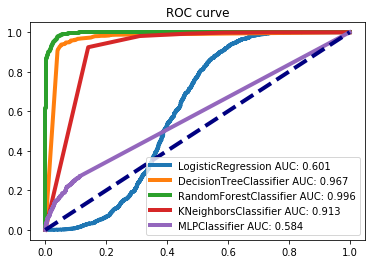

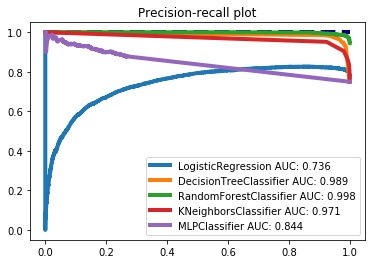

In [22]:
np.random.seed(42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', None)])
roc_things = []
precision_recall_things = []

for classifier in classifiers:
    clf.set_params(clf=classifier).fit(X_train, y_train)
    classifier_name = classifier.__class__.__name__
    print(str(classifier))
    print("model score: %.3f" % clf.score(X_test, y_test))
    
    
    y_score = np.array(clf.predict_proba(X_test)[:,1])
    print(y_test)
    print(y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_things.append((fpr, tpr, '{} AUC: {:.3f}'.format(classifier_name, roc_auc)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    precision_recall_things.append((recall, precision, thresholds, '{} AUC: {:.3f}'.format(classifier_name, pr_auc)))
    #plot_precision_recall_curve(clf, X_test, y_test)
    
    print('average precision score: {:.3f}'.format(average_precision_score(y_test, y_score)))
    print('roc_auc_score: {:.3f}'.format(roc_auc))
    print('precision-recall AUC: {:.3f}'.format(pr_auc))
    print()

roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # dadgum no-skill line
plt.legend()
plt.title('ROC curve')
          
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw, label=label)
ratio = y_test[y_test].shape[0] / y_test.shape[0]
plt.hlines(y=ratio, xmin=0, xmax=1, color='navy', lw=lw, linestyle='--') # dadgum no-skill line
plt.title('Precision-recall plot')
plt.legend()

In [19]:
from scipy.stats import hmean
import numpy.ma as ma

recall, precision, thresholds, _ = precision_recall_things[2]

a = np.column_stack((recall,precision))

# harmonic mean is only valid for values greater than 0.
# "mask" out any rows with values less than or equal to 0
# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.mask_rows.html
a = ma.masked_less_equal(a, 0)
a = ma.mask_rows(a)
f1 = hmean(a,axis=1)

# np.argmax returns the index of the largest value in an array. This will map to the threshold array that
# was associated with the precision and recall which generated that "best F1 score"
# I'm sure there's a better way to do the above, but IDK I'm a noob
threshold_that_maximizes_f1 = thresholds[np.argmax(f1)]
print('threshold that optimizes f1: {}'.format(threshold_that_maximizes_f1))

threshold that optimizes f1: 0.39525382955225735
